<a href="https://colab.research.google.com/github/jdunaq/Data-Science-Portfolio/blob/main/D2D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D2D Final Project**
**Jess Dunsmore**

**Gavin Welch**

Due: 04/23/2024



In [ ]:
# Import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import export_text
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# Import raw data as dataframe
raw = pd.read_csv('TipData.csv')

# Visualize raw dataset
print(raw)




    Gender_P  Age_P Gender_S  Age_S Drinks  Group      Type        Area Month  \
0     Female     41     Male     21      Y      2  American       South   Feb   
1       Male     20   Female     18      Y      3    TexMex     Midwest   Jan   
2       Male     39   Female     25      Y      3    TexMex     Midwest   Aug   
3       Male     37   Female     31      N      2     Asian  East Coast   Oct   
4     Female     19   Female     19      Y      4  American  West Coast   Mar   
..       ...    ...      ...    ...    ...    ...       ...         ...   ...   
295   Female     38   Female     24      Y      1  American  West Coast   Jun   
296   Female     28     Male     29      Y      2  American  West Coast   Oct   
297   Female     25     Male     29      N      1   Italian     Midwest   Nov   
298   Female     34     Male     30      Y      4   Italian       South   Nov   
299   Female     54     Male     27      Y      4   Italian  West Coast   Jan   

       Time   Tip  
0    Di

# Supervised Learning Methods

###Linear Regression

After observation of the data on Excel, it was decided that the age of the payer, the time of the meal, the type of meal, and the group size have a strong influence on the tip percentage.

In [ ]:
# Assigning integers to time of meal
raw.loc[raw['Time'] == 'Dinner',['Time']]=0
raw.loc[raw['Time'] == 'Lunch',['Time']]=1

# Assigning integers to type of meal
raw.loc[raw['Type'] == 'American',['Type']]=0
raw.loc[raw['Type'] == 'TexMex',['Type']]=1
raw.loc[raw['Type'] == 'Asian',['Type']]=2
raw.loc[raw['Type'] == 'Italian',['Type']]=3
raw.loc[raw['Type'] == 'Indian',['Type']]=4

# Make array ascend by tip value
raw = raw.sort_values(by='Tip',ascending=True)

# Tip payer age, meal type, meal (feature data)
xdata = raw.iloc[:,[1,5,6,9]].values
# Tip percentage (target data)
ydata = raw.iloc[:,10].values

# Split the data into test and training data (75% of the data as training data)
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.25, random_state=0)

# Perform the linear regression modeling
lg = linear_model.LinearRegression()
reg = lg.fit(xtrain,ytrain)

# Make predictions using the model based on the training data
ypred = lg.predict(xtrain)
rlpred = lg.score(xtrain,ytrain)
print('R^2 value for training data (linear regression) = %.3f'% rlpred)
print("Training Accuracy (linear regression) ... ", mae(ytrain,ypred))

# Make predictions using the model based on the test data
test_p = lg.predict(xtest)
rltest = lg.score(xtest,ytest)
print('R^2 value for test data (linear regression) = %.3f'% rltest)
print("Test Accuracy (linear regression) ... ", mae(ytest,test_p))


R^2 value for training data (linear regression) = 0.046
Training Accuracy (linear regression) ...  0.031003903550284595
R^2 value for test data (linear regression) = -0.006
Test Accuracy (linear regression) ...  0.03465289422789947


The low values for the mean absolute error indicate that the model has worked with high accuracy. However the R^2 values are extremely low. This means that the model has fitted poorly to the data. In the subsequent section it can be seen that the data chosen is highly noisy which contributes to this fact. The figure below shows that the model performs an acceptable job of following the average trend in the data. As such, it is decided that the results obtained are adequate for further analysis.

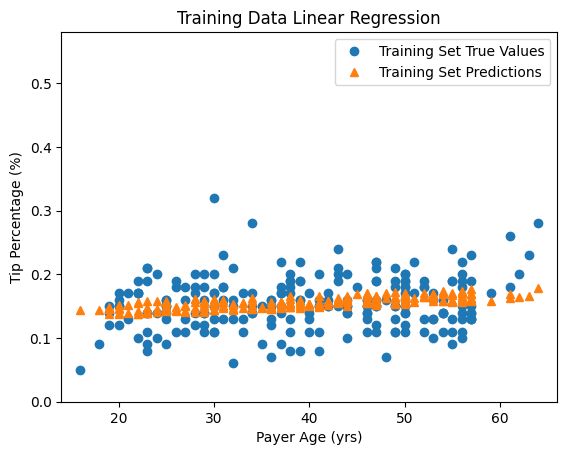

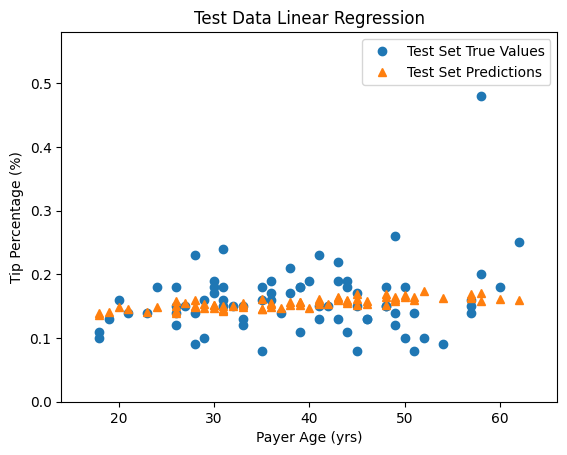

In [ ]:
# Training true and linear regression results plotted
plt.figure()
plt.plot(xtrain[:,0],ytrain,'o',label='Training Set True Values')
plt.plot(xtrain[:,0],ypred,'^', label='Training Set Predictions')
plt.title('Training Data Linear Regression')
plt.xlabel('Payer Age (yrs)')
plt.ylabel('Tip Percentage (%)')
ax = plt.gca()
ax.set_xlim([min(raw.iloc[:,1])-2, max(raw.iloc[:,1])+2])
ax.set_ylim([min(raw.iloc[:,10]-0.05), max(raw.iloc[:,10])+0.1])
plt.legend()

# Test true and linear regression results plotted
plt.figure()
plt.plot(xtest[:,0],ytest,'o',label='Test Set True Values')
plt.plot(xtest[:,0],test_p,'^',label='Test Set Predictions')
plt.title('Test Data Linear Regression')
plt.xlabel('Payer Age (yrs)')
plt.ylabel('Tip Percentage (%)')
ax = plt.gca()
ax.set_xlim([min(raw.iloc[:,1])-2, max(raw.iloc[:,1])+2])
ax.set_ylim([min(raw.iloc[:,10])-0.05, max(raw.iloc[:,10])+0.1])
plt.legend()

In [ ]:
# Predict a tip amount based upon the age of the payer, the type of cuisine,
# the group size, and the time of the meal


# Request values from user
lst = []
requests = ['Payer Age ('+str(min(raw.iloc[:,1]))+' - '+str(max(raw.iloc[:,1]))+') = ','Group Size (1-6) = ','Meal Time (0 = dinner, 1 = lunch) = ','\n0 = American\n1 = TexMex\n2 = Asian\n3 = Italian\n4 = Indian\nType of Cuisine = ']
n = 4

for i in range(0,n):
  ele = int(input(requests[i]))
  lst.append(ele)

# Ensuring that user inputs data within the eligible range of values
if lst[0]<min(raw.iloc[:,1]) or lst[0]>max(raw.iloc[:,1]):
  raise Exception('Choose an age between ',min(raw.iloc[:,1]),' and ',max(raw.iloc[:,1]))
elif lst[1]<1 or lst[1]>max(raw.iloc[:,5]):
  raise Exception('Choose a group size between 1 and'+str(max(raw.iloc[:,5])))
elif lst[2]!=1 and lst[2]!=0:
  raise Exception('Choose a meal time of 0 = dinner or 1 = lunch')
elif lst[3]!=0 and lst[3]!=1 and lst[3]!=2 and lst[3]!=3 and lst[3]!=4:
  raise Exception('Choose a meal type of 0 = American, 1 = TexMex, 2 = Asian, 3 = Italian, 4 = Indian')




Payer Age (16 - 64) = 34
Group Size (1-6) = 3
Meal Time (0 = dinner, 1 = lunch) = 1

0 = American
1 = TexMex
2 = Asian
3 = Italian
4 = Indian
Type of Cuisine = 3


In [ ]:
# Prediction of tip value using linear regression
tip_pr = reg.coef_[0]*lst[0]+reg.coef_[1]*lst[1]+reg.coef_[2]*lst[2]+reg.coef_[3]*lst[3]+reg.intercept_
print('The tip prediction with linear regression = %.2f %%'% tip_pr)

The tip prediction with linear regression = 0.17 %


###Decision Tree Analysis

In [ ]:
# Creation of regressor object
regressor = tree.DecisionTreeRegressor(random_state=0,max_depth = 15)

# Tip payer age, group size, meal time, meal type
xdata = raw.iloc[:,[1,5,6,9]].values
# Tip percentage
ydata = raw.iloc[:,10].values

# Fitting data to the decision tree
regressor.fit(xdata,ydata)
# Checking number of levels in decision tree
tree_depth = regressor.get_depth()
# Checking decision tree accuracy
tree_acc = regressor.score(xdata,ydata)


# Making a prediction with the decision tree
dt_ypred = regressor.predict([lst])
print('The tip prediction using a decision tree algorithm = %.2f %%'% dt_ypred[0])
print('The decision tree depth is to %i'% tree_depth ,'levels')
print('The accuracy of the decision tree is = %.2f'% tree_acc)


The tip prediction using a decision tree algorithm = 0.28 %
The decision tree depth is to 15 levels
The accuracy of the decision tree is = 0.80


As can be seen, the decision tree has performed with relatively high accuracy when applied to the chosen tip data. It has been chosen not to display the entire decision tree here due to spatial limitations and the high number of levels in the decision tree.

# Unsupervised Methods

###KMeans Clustering

In [ ]:
# Creating a vector of the true tip percentage values
yset = raw['Tip'].tolist()

# Assigning integers to time of meal
raw.loc[raw['Time'] == 'Dinner',['Time']]=0
raw.loc[raw['Time'] == 'Lunch',['Time']]=1

raw.loc[raw['Type'] == 'American',['Type']]=0
raw.loc[raw['Type'] == 'TexMex',['Type']]=1
raw.loc[raw['Type'] == 'Asian',['Type']]=2
raw.loc[raw['Type'] == 'Italian',['Type']]=3
raw.loc[raw['Type'] == 'Indian',['Type']]=4


# Have chosen age of payer, group size, time of meal, and type of meal as model training data
xset = raw[['Age_P','Group','Time','Type']].to_numpy()


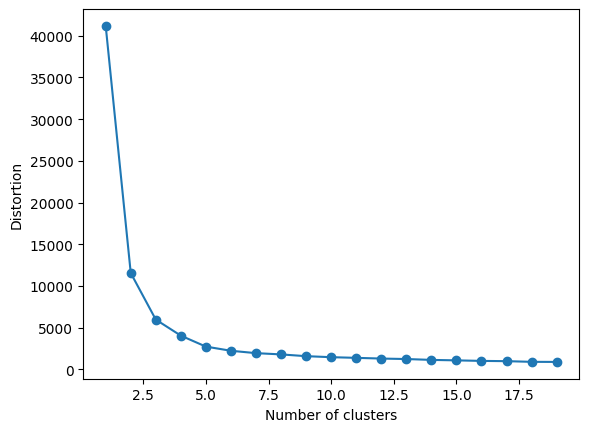

In [ ]:
distortions = []
# Calculating the dispersion of cluster for a given number of clusters
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km.fit(xset)
    #Sum of squared distances of sample points to their closest cluster center
    distortions.append(km.inertia_)

plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


Note that a cluster value of 3 appears to be appropriate according to the knee diagram as the graph appears to have passed its inflection point.

In [ ]:
# Apply KMeans algorithm to data and predict spending bracket
km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=100, tol=1e-4, random_state=0)
y_km = km.fit_predict(xset)


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for KMeans clustering
silhouette_avg = silhouette_score(xset, y_km)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5173520094002411


This Silhouette score indicates that the clustering is reasonably good. Silhouette scores range from -1 to 1, where 1 indicates that the data is well clustered and is a good fit, and -1 indicates that the data is probably assigned to the wrong clusters.

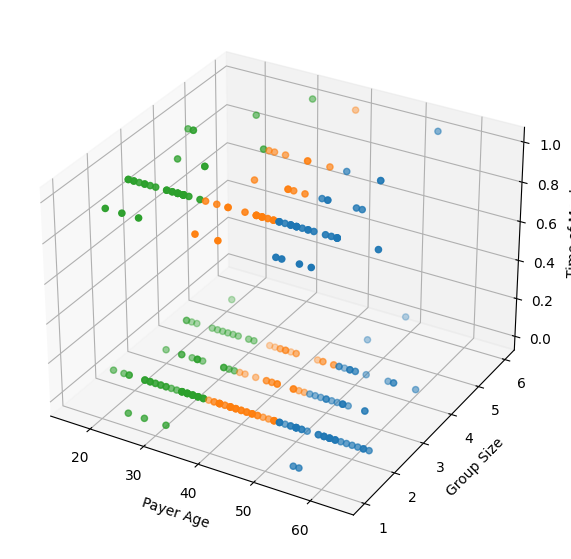

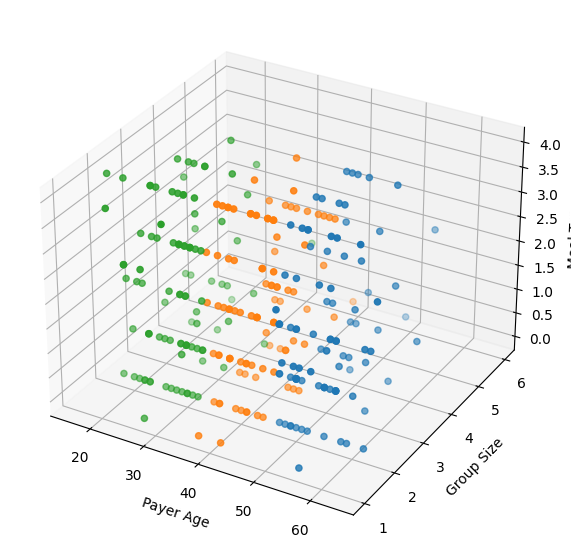

In [ ]:
# Plotting clusters of payer age, group size, and time of meal (3D plot)
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = fig.add_subplot(projection='3d')
ax.scatter(xset[y_km == 0,0], xset[y_km == 0,1], xset[y_km == 0,2])
ax.scatter(xset[y_km == 1,0], xset[y_km == 1,1], xset[y_km == 1,2])
ax.scatter(xset[y_km == 2,0], xset[y_km == 2,1], xset[y_km == 2,2])
ax.set_xlabel('Payer Age')
ax.set_ylabel('Group Size')
ax.set_zlabel('Time of Meal')
plt.show()


# Plotting clusters of payer age, group size, and meal type (3D plot)
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
ax = fig.add_subplot(projection='3d')
ax.scatter(xset[y_km == 0,0], xset[y_km == 0,1], xset[y_km == 0,3])
ax.scatter(xset[y_km == 1,0], xset[y_km == 1,1], xset[y_km == 1,3])
ax.scatter(xset[y_km == 2,0], xset[y_km == 2,1], xset[y_km == 2,3])
ax.set_xlabel('Payer Age')
ax.set_ylabel('Group Size')
ax.set_zlabel('Meal Type')
plt.show()


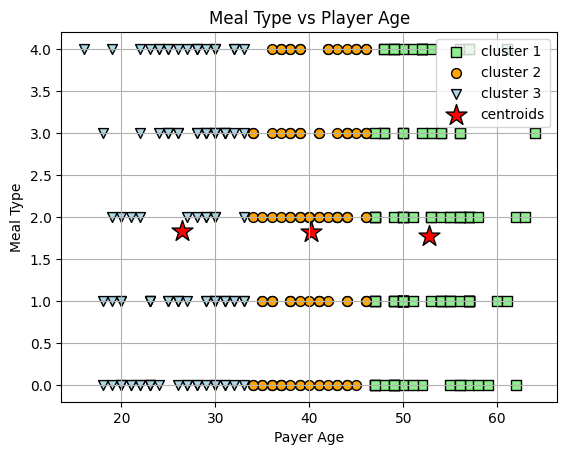

In [ ]:
# Plotting time of meal and payer age (2D plot)
plt.scatter(xset[y_km == 0,0], xset[y_km == 0,3],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1')
plt.scatter(xset[y_km == 1,0], xset[y_km == 1,3],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(xset[y_km == 2,0], xset[y_km == 2,3],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,3],s=250, marker='*',c='red', edgecolor='black',label='centroids')



plt.xlabel('Payer Age')
plt.ylabel('Meal Type')
plt.title('Meal Type vs Payer Age')
plt.legend()
plt.grid()
plt.show()

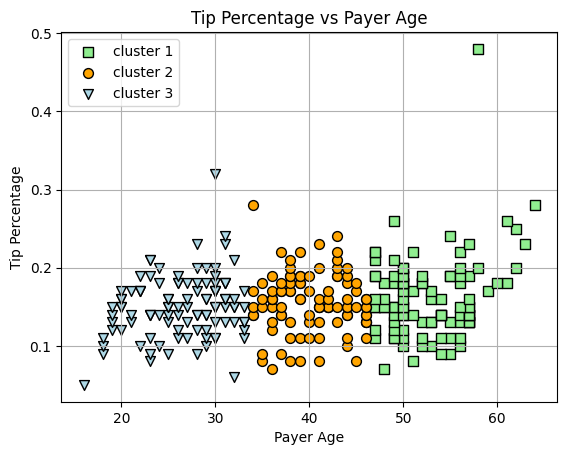

In [ ]:
# Plotting time of meal and payer age (2D plot)
plt.scatter(xset[y_km == 0,0], raw.iloc[y_km==0,10],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1')
plt.scatter(xset[y_km == 1,0], raw.iloc[y_km==1,10],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(xset[y_km == 2,0], raw.iloc[y_km==2,10],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')

plt.xlabel('Payer Age')
plt.ylabel('Tip Percentage')
plt.title('Tip Percentage vs Payer Age')
plt.legend()
plt.grid()
plt.show()

It appears that while the data has been clustered well. The chosen datapoints have not been able to cluster into separate clusters defined by tip percentage amount.

###Hierarchical Clustering

In [ ]:
# Perform hierarchical clustering on the data
hc = AgglomerativeClustering(n_clusters=3, affinity='cosine',linkage='complete')
y_hc = hc.fit_predict(xset)

cluster_accuracy_hc = metrics.accuracy_score(y_hc,yset)
print("Hierarchy Cluster Analysis Accuracy ... ", cluster_accuracy_hc)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


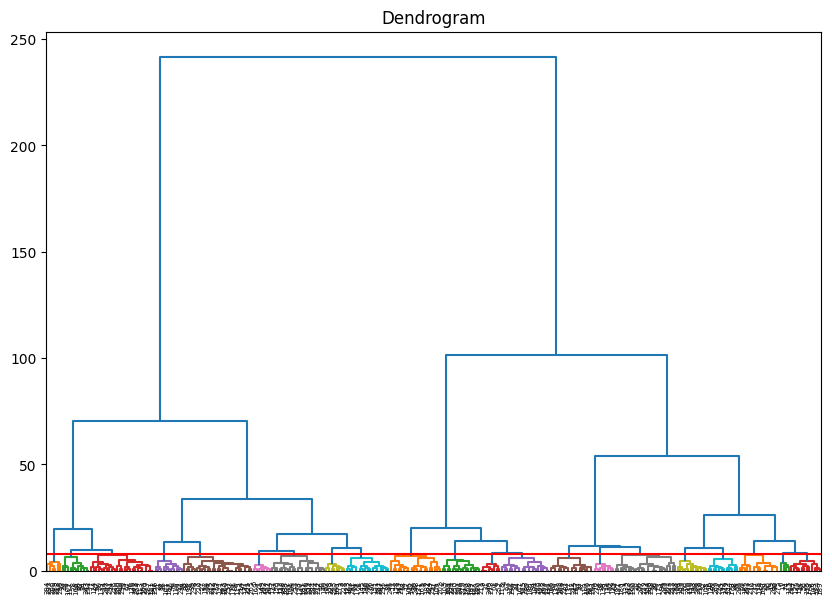

In [ ]:
# Plotting results of hierarchical clustering
clusters = shc.linkage(xset,method = 'ward',metric='euclidean')
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
shc.dendrogram(Z=clusters,color_threshold=8)
plt.axhline(y=50, color = 'r',linestyle = '-')


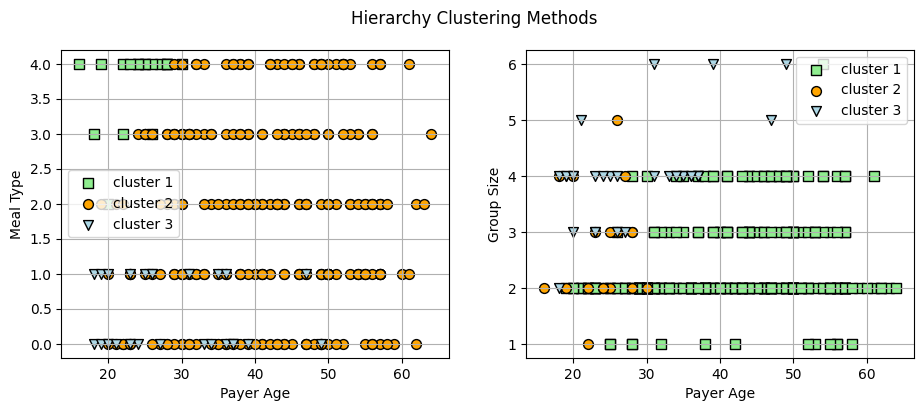

In [ ]:
# Setup the figure
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hierarchy Clustering Methods')
fig.set_figheight(4)
fig.set_figwidth(11)
ax1.set_xlabel('Payer Age')
ax1.set_ylabel('Meal Type')
ax2.set_xlabel('Payer Age')
ax2.set_ylabel('Group Size')

# Plot the hierarchy results in a scatter format
ax1.scatter(xset[y_hc == 0, 0], xset[y_hc == 0, 3],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1')
ax1.scatter(xset[y_hc == 1, 0], xset[y_hc == 1, 3],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
ax1.scatter(xset[y_hc == 2, 0], xset[y_hc == 2, 3],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')
ax1.legend()
ax1.grid()

# Plot the hierarchy results in a scatter format (clusters 0 and 1 switched)
ax2.scatter(xset[y_hc == 1, 0], xset[y_hc == 1, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1')
ax2.scatter(xset[y_hc == 0, 0], xset[y_hc == 0, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
ax2.scatter(xset[y_hc == 2, 0], xset[y_hc == 2, 1],s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')
ax2.legend()
ax2.grid()
plt.show()

The hierarchical clustering attempt appears to have performed more poorly than the KMeans clustering attempt.

## Final Decision

In [ ]:
# Weighted average of techniques used to calculate the final tip amount (supervised learning)
final_tip_amount = ((1-mae(ytest,test_p))*tip_pr+tree_acc*dt_ypred[0])/((1-mae(ytest,test_p))+tree_acc)

print('The final tip estimate using Supervised Learning = %.2f %%'% final_tip_amount)

The final tip estimate using Supervised Learning = 0.18 %


# Model Comparisons

In [ ]:
from sklearn.metrics import silhouette_score

# Linear Regression Model Evaluation
linear_regression_mae = mae(ytest, test_p)

# Make predictions using the decision tree model on the test set
dt_ypred = regressor.predict(xtest)

# Calculate the Mean Absolute Error (MAE) for the decision tree regression model
decision_tree_mae = mae(ytest, dt_ypred)

# Decision Tree Regression Model Evaluation
decision_tree_mae = mae(ytest, dt_ypred)

# KMeans Clustering Model Evaluation
silhouette_avg = silhouette_score(xset, y_km)
silhouette_avg2 = silhouette_score(xset, y_hc)

print(f"Mean Absolute Error (Linear Regression): {linear_regression_mae:.4f}")
print(f"Mean Absolute Error (Decision Tree Regression): {decision_tree_mae:.4f}")
print(f"Silhouette Score (KMeans Clustering): {silhouette_avg:.4f}")
print(f"Silhouette Score (Hierarchical Clustering): {silhouette_avg2:.4f}")


Mean Absolute Error (Linear Regression): 0.0347
Mean Absolute Error (Decision Tree Regression): 0.0081
Silhouette Score (KMeans Clustering): 0.5174
Silhouette Score (Hierarchical Clustering): 0.0996


**Mean Absolute Error (MAE)**

Lower MAE values indicate better accuracy for regression models.
Decision Tree Regression has a significantly lower MAE (0.0081) compared to Linear Regression (0.0347), indicating that the Decision Tree Regression model performs better and is more accurate in predicting the tip percentage.

**Silhouette Score**

Silhouette score ranges from -1 to 1.
Higher silhouette scores indicate better-defined clusters for clustering models.
The KMeans Clustering model has a silhouette score of 0.5174, which indicates moderate clustering quality with some well-defined clusters but also some overlap between clusters.

**Conclusion:**

The Decision Tree Regression model is the most accurate among the evaluated models based on the MAE values.
The KMeans Clustering model provides moderate clustering quality with some well-defined clusters but has room for improvement. It has not clustered the data into separate categories of tip percentage amount. The hierarchical clustering attempt performed to a lower standard than the kmeans clustering. The lower performance of clustering methods suggests that insufficient data preprocessing has taken place, or that there is an insufficient correlation in the data between the feature data chosen and the target data.
